In [1]:
#packages needs to installed
# numpy, pandas, matplotlib, scikit-learn, seaborn, nltk, wordcloud, xgboost

In [2]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
### Exploratory Data Analysis

# Exploratory Data Analysis

In [94]:
data = pd.read_csv(r"C:\Users\user\Downloads\amazon_alexa.tsv", delimiter = "\t", quoting = 3)

print(f" Dataset Shape: {data.shape}")

 Dataset Shape: (3150, 5)


In [95]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [96]:
print(f"Features Names: {data.columns.values}")

Features Names: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [97]:
# checking if any null values present or not
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [9]:
data[data["verified_reviews"].isnull()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [98]:
#removing null value
data.dropna(inplace=True)

print(f"Dataset Shape after removing null values: {data.shape}")

Dataset Shape after removing null values: (3149, 5)


In [11]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [12]:
data["verified_review_len"] = data["verified_reviews"].apply(len)

data.head()

,rating,date,variation,verified_reviews,feedback,verified_review_len
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [13]:
print(f"0th review : {data.iloc[0]['verified_reviews']} and its len: {len(data.iloc[0]['verified_reviews'])} and its verified_review_len: {data.iloc[0]['verified_review_len']}")

0th review : Love my Echo! and its len: 13 and its verified_review_len: 13


In [101]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

#### Analysis of Data
1) looking into each and every column and analysis it.
2) Calculating Percentage Distribution of values.
3) Plotting them for visual representation.

In [15]:
# counting the rating's given by the customers.
data["rating"].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

Text(0, 0.5, 'count')

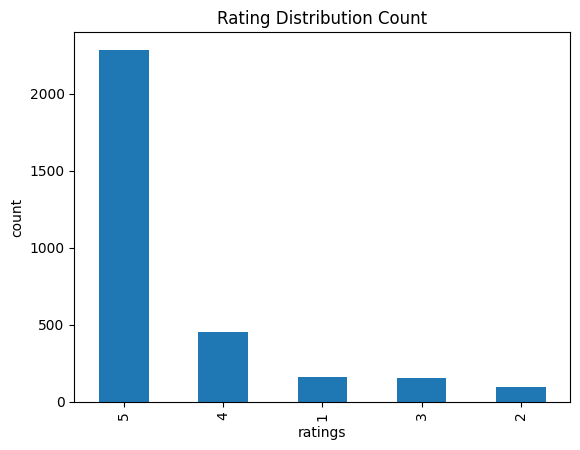

In [16]:
# plotting bar graph 
data['rating'].value_counts().plot.bar()
plt.title("Rating Distribution Count")
plt.xlabel("ratings")
plt.ylabel("count")

In [17]:
print(f"Percentage Distribution of Ratings : {round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Percentage Distribution of Ratings : rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


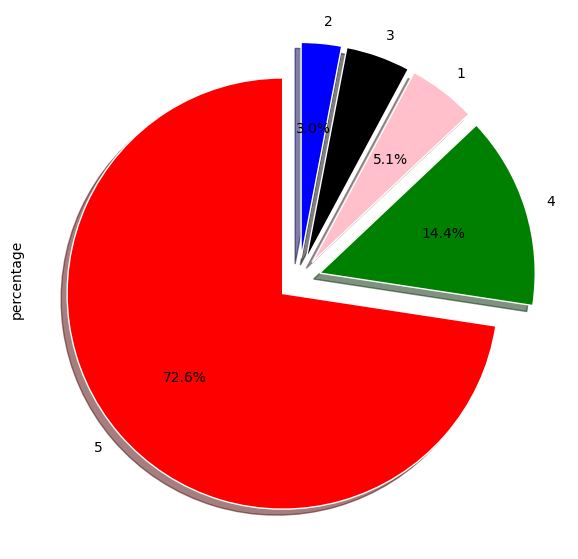

In [18]:
fig = plt.figure(figsize=(7,7))

colours = ('red', 'green', 'pink', 'black', 'blue')

wp = {'linewidth' : 1, 'edgecolor': 'white'}

tags = data['rating'].value_counts()/data.shape[0]

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colours, startangle=90, wedgeprops=wp, explode=explode, label='percentage')

from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format='png')

In [19]:
## Analyzing feedback column

data.head()

,rating,date,variation,verified_reviews,feedback,verified_review_len
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [20]:
print(data['feedback'].value_counts())
# 'o' means negavtive feedback and '1' means positive feedback

feedback
1    2893
0     256
Name: count, dtype: int64


Text(0.5, 1.0, 'Feedback Count')

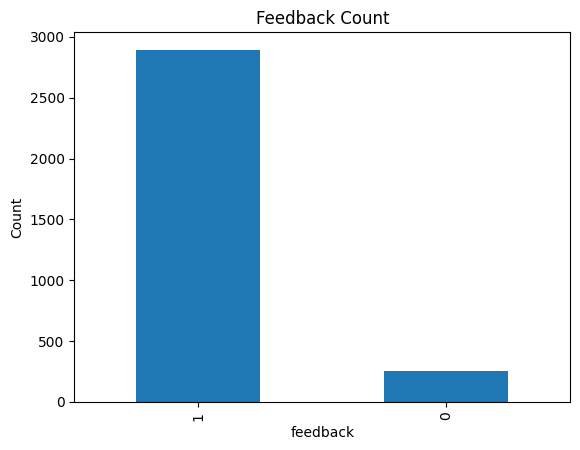

In [21]:
data['feedback'].value_counts().plot.bar()
plt.xlabel("feedback")
plt.ylabel("Count")
plt.title("Feedback Count")

In [22]:
print(f"Percentage ditribution of feedback : {round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Percentage ditribution of feedback : feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='percentage distribution of feedback'>

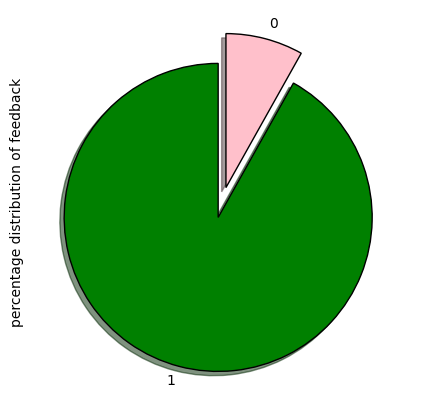

In [23]:
fig = plt.figure(figsize=(5,5),)

tags = data['feedback'].value_counts()/data.shape[0]

color = ('green', 'pink')

wp = {'linewidth': 1, 'edgecolor': 'black'}

explode = (0.1, 0.1)

tags.plot(kind='pie', colors=color, explode=explode, shadow=True, wedgeprops=wp, label='percentage distribution of feedback', startangle=90)

In [24]:
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [25]:
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [26]:
## from above observation if rating is [1,2] than feedback is negative and if rating is [3,4,5] than feedback is positive.

In [27]:
data.head()

,rating,date,variation,verified_reviews,feedback,verified_review_len
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [28]:
data['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

Text(0, 0.5, 'count')

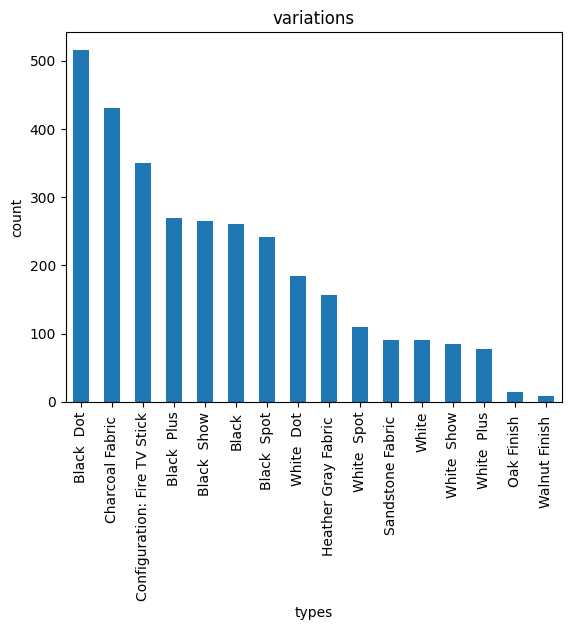

In [29]:
data['variation'].value_counts().plot.bar()
plt.title('variations')
plt.xlabel('types')
plt.ylabel('count')

In [30]:
print(f"Postive reviews for variations: {data[data['feedback'] == 1]['variation'].value_counts()}")

Postive reviews for variations: variation
Black  Dot                      480
Charcoal Fabric                 418
Configuration: Fire TV Stick    322
Black  Show                     247
Black  Plus                     242
Black                           226
Black  Spot                     209
White  Dot                      172
Heather Gray Fabric             155
White  Spot                      97
Sandstone Fabric                 84
White                            74
White  Show                      74
White  Plus                      70
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


Text(0, 0.5, 'count')

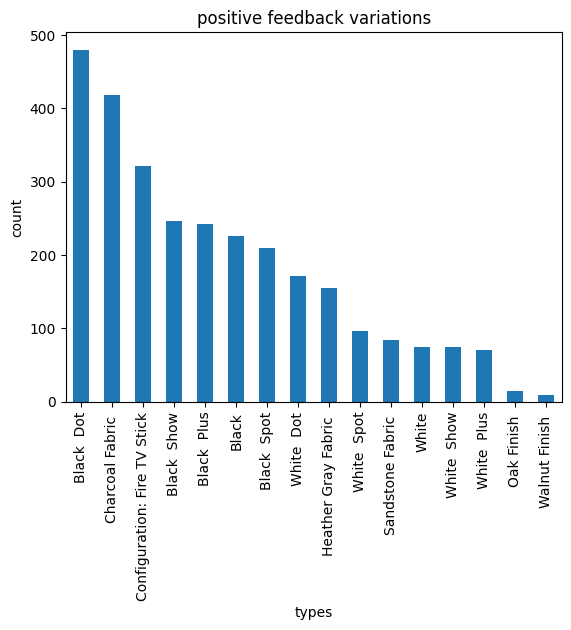

In [31]:
data[data['feedback'] == 1]['variation'].value_counts().plot.bar()
plt.title('positive feedback variations')
plt.xlabel('types')
plt.ylabel('count')

In [32]:
print(f"Negative reviews for variations: {data[data['feedback'] == 0]['variation'].value_counts()}")

Negative reviews for variations: variation
Black  Dot                      36
Black                           35
Black  Spot                     32
Black  Plus                     28
Configuration: Fire TV Stick    28
Black  Show                     18
White                           16
White  Dot                      12
Charcoal Fabric                 12
White  Spot                     12
White  Show                     11
White  Plus                      8
Sandstone Fabric                 6
Heather Gray Fabric              2
Name: count, dtype: int64


Text(0, 0.5, 'count')

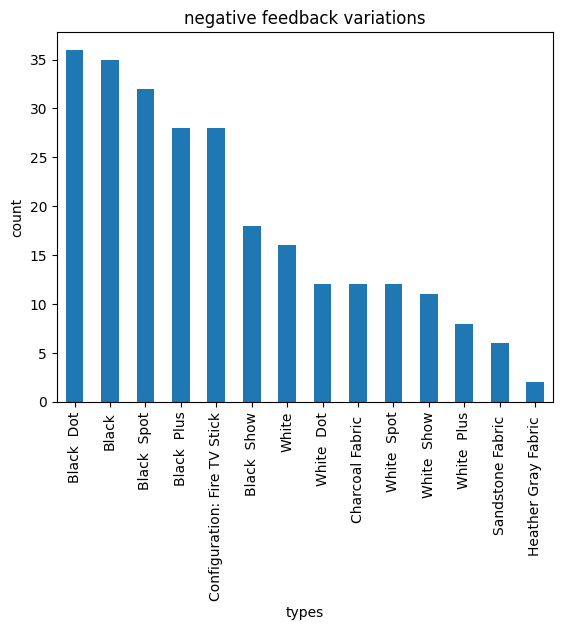

In [33]:
data[data['feedback'] == 0]['variation'].value_counts().plot.bar()
plt.title('negative feedback variations')
plt.xlabel('types')
plt.ylabel('count')

In [34]:
# percentage ditribution of variations

print(f"Percentage ditribution for variation: {round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Percentage ditribution for variation: variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [35]:
#mean distribution of variations by rartings
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

Text(0, 0.5, 'rating')

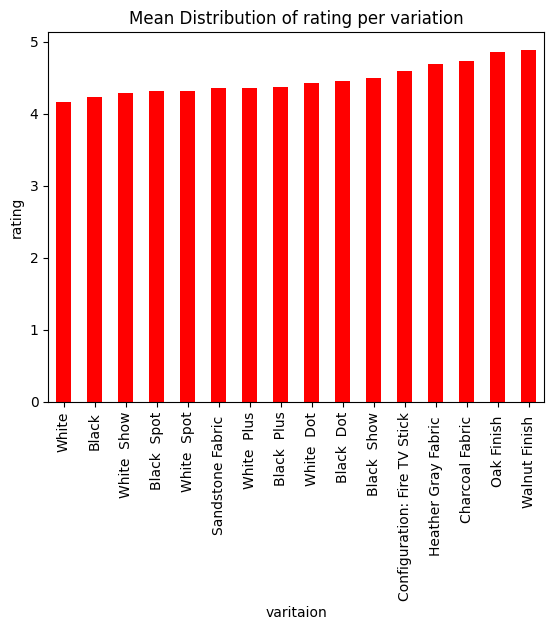

In [36]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='red')
plt.title('Mean Distribution of rating per variation')
plt.xlabel('varitaion')
plt.ylabel('rating')

In [37]:
data.head()

,rating,date,variation,verified_reviews,feedback,verified_review_len
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [38]:
data['verified_reviews'].value_counts()

verified_reviews
                                                                                                                                                                                                                                                                                                               79
Love it!                                                                                                                                                                                                                                                                                                       22
Love it                                                                                                                                                                                                                                                                                                        19
Great product                                                    

In [39]:
print(f"Negatives Reviews: {data[data['feedback']==0]['verified_reviews']}")

Negatives Reviews: 46      "It's like Siri, in fact, Siri answers more ac...
111     Sound is terrible if u want good music too get...
141                                    Not much features.
162     "Stopped working after 2 weeks ,didn't follow ...
176                                  Sad joke. Worthless.
                              ...                        
3047    Echo Dot responds to us when we aren't even ta...
3048                NOT CONNECTED TO MY PHONE PLAYLIST :(
3067    The only negative we have on this product is t...
3091                                    I didn’t order it
3096    The product sounded the same as the emoji spea...
Name: verified_reviews, Length: 256, dtype: object


In [40]:
print(f"Positive Reviews: {data[data['feedback']==1]['verified_reviews']}")

Positive Reviews: 0                                           Love my Echo!
1                                               Loved it!
2       "Sometimes while playing a game, you can answe...
3       "I have had a lot of fun with this thing. My 4...
4                                                   Music
                              ...                        
3145    "Perfect for kids, adults and everyone in betw...
3146    "Listening to music, searching locations, chec...
3147    "I do love these things, i have them running m...
3148    "Only complaint I have is that the sound quali...
3149                                                 Good
Name: verified_reviews, Length: 2893, dtype: object


##### CountVectorizer is a feature extraction method provided by the sklearn.feature_extraction.text module in Python's scikit-learn library. It converts a collection of text documents into a matrix of token counts (i.e., a bag of words representation), which is often used as a preprocessing step for machine learning models working with text data.

In [41]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)
# Convert the matrix into a dense format (array) and print it
print(words.toarray())
# Print the feature names (vocabulary)
print(cv.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

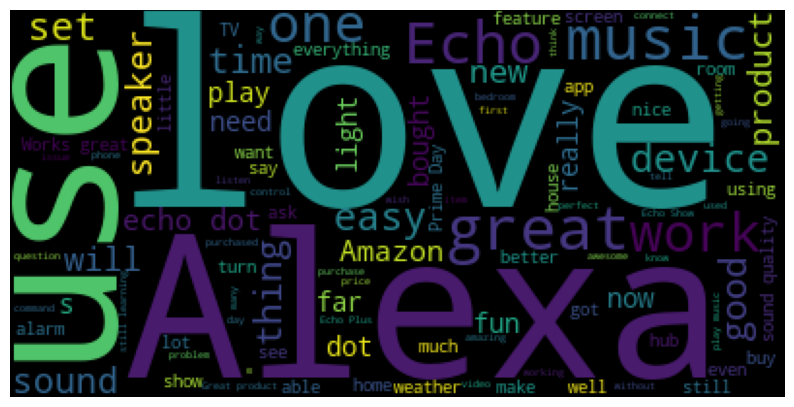

In [42]:
## combine all reviews

words = " ".join(review for review in data['verified_reviews'])

#initialise wordcloud object

wc = WordCloud(background_color='black', max_words=100)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(words))
plt.axis('off')

In [43]:
 ## seperating negative reviews and positivwe reviews

negative_reviews = " ".join(data[data['feedback']==0]['verified_reviews'])
positive_reviews = " ".join(data[data['feedback']==1]['verified_reviews'])


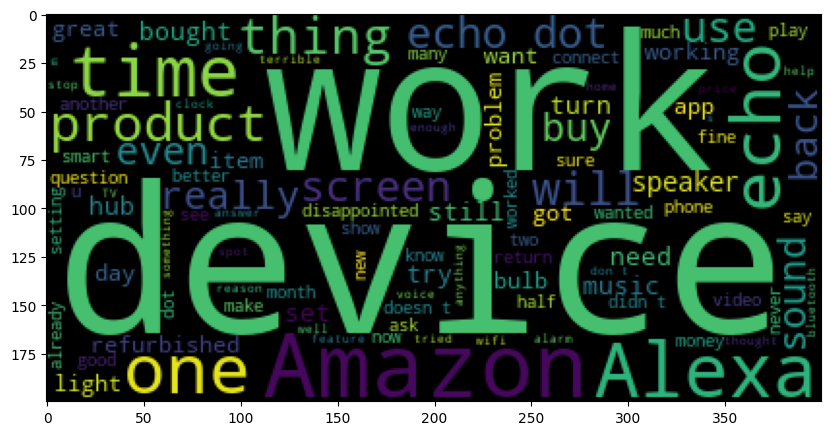

In [44]:
## wordcloud for negative reviews
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(negative_reviews))

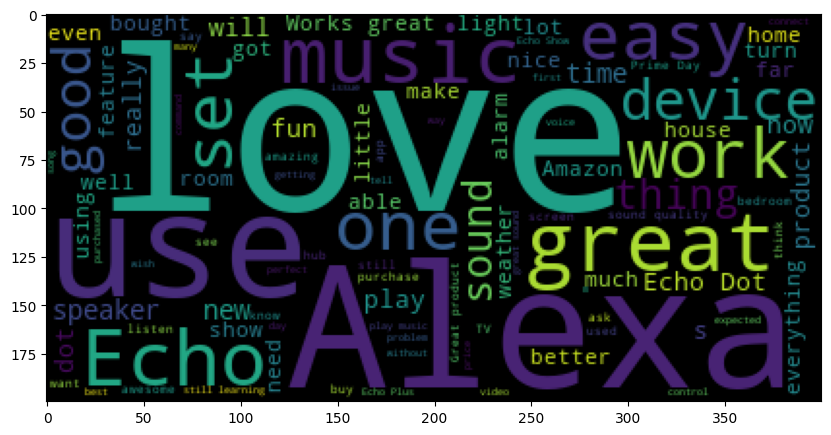

In [45]:
## wordcloud for negative reviews
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(positive_reviews))

##### Model Building and Processing

##### Preprocessing
1) Building any non alphabet character with a space.
2) convert into lower cases ad split into words
3) Iterate over the individual and if it is not a stopword than add stemmed form of word to corpus

In [46]:
corpus = []
stemmer = PorterStemmer()

for i in range(0,data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

###### Using CountVectorisation to create bag of words

In [47]:
cv = CountVectorizer(max_features = 2500)

words = cv.fit_transform(corpus)
# converted the words into matrix form
print(words.toarray())
# bag of words for verified_reviews
print(len(cv.get_feature_names_out()))
words = words.toarray()
values = data['feedback'].values

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2500


In [106]:
## Saving Count Vectorizer
with open("C:\\Users\\user\\OneDrive\\ML_Projects\\Sentiment_Analysis\\models\\amazon_alexa_countvectorizer.pkl", 'wb') as file:
    pickle.dump(cv, file)

In [49]:
print(words.shape)
print(values.shape)

(3149, 2500)
(3149,)


###### Spliting data into train, test where 30% data for testing

In [50]:
x_train, x_test, y_train, y_test = train_test_split(words, values, test_size=0.3, random_state=15)

print(f"len of x_train: {x_train.shape} and len of y_train: {y_train.shape}")
print(f"len of x_test: {x_test.shape} and len of y_test: {y_test.shape}")

len of x_train: (2204, 2500) and len of y_train: (2204,)
len of x_test: (945, 2500) and len of y_test: (945,)


In [51]:
print(x_train.max())
print(x_test.max())

12
10


In [52]:
## scaling x_train, x_test values

scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

print(scaled_x_train.max())

1.0


In [115]:
## saving scaler model

with open('C:\\Users\\user\\OneDrive\\ML_Projects\\Sentiment_Analysis\\models\\amazon_alexa_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

###### RandomForestClassifer

In [54]:
model_rf = RandomForestClassifier()
model_rf.fit(scaled_x_train, y_train)

RandomForestClassifier()

In [55]:
print(f"Training Accuracy: {model_rf.score(scaled_x_train, y_train)}")
print(f"Testing Accuracy: {model_rf.score(scaled_x_test, y_test)}")

Training Accuracy: 0.9941016333938294
Testing Accuracy: 0.944973544973545


In [56]:
# prediction of test set
y_pred = model_rf.predict(scaled_x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

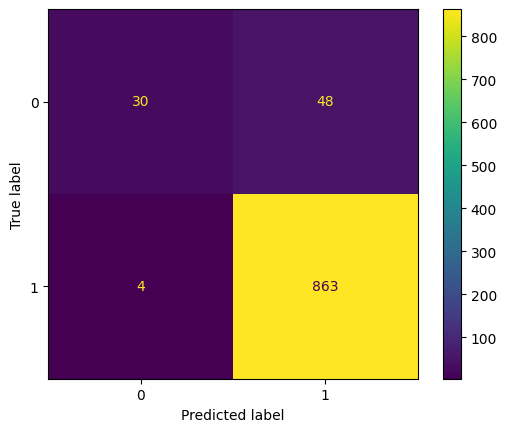

In [57]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

###### K fold cross-validation

In [61]:
accuracies = cross_val_score(estimator = model_rf, X = scaled_x_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.930129576306047
Standard Variance : 0.006458355384816959


###### Applying grid search to get the optimal parameters on random forest

In [64]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [66]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(scaled_x_train, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [68]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}


In [113]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_pred))

Cross validation mean accuracy on train set : 96.79559891107078
Cross validation mean accuracy on test set : 92.10526315789474
Accuracy score for test set : 0.944973544973545


In [114]:
## saving rf model

with open('C:\\Users\\user\\OneDrive\\ML_Projects\\Sentiment_Analysis\\models\\amazon_alexa_model_rf.pkl', 'wb') as file:
    pickle.dump(scaler, file)

###### XgBoost

In [72]:
model_xgb = XGBClassifier()
model_xgb.fit(scaled_x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(scaled_x_train, y_train))
print("Testing Accuracy :", model_xgb.score(scaled_x_test, y_test))

Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9417989417989417


In [77]:
y_preds = model_xgb.predict(x_test)

In [78]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 31  47]
 [ 13 854]]


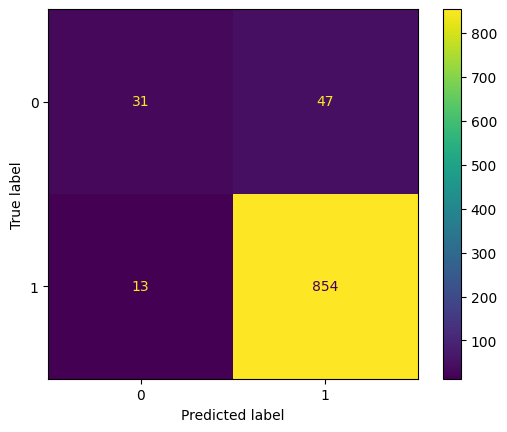

In [79]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [108]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('C:\\Users\\user\\OneDrive\\ML_Projects\\Sentiment_Analysis\\models\\amazon_alexa_model_xgb.pkl', 'wb'))

###### Decision Tree Classifier

In [83]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(scaled_x_train, y_train)

DecisionTreeClassifier()

In [86]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dtc.score(scaled_x_train, y_train))
print("Testing Accuracy :", model_dtc.score(scaled_x_test, y_test))

Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.9238095238095239


In [89]:
y_preds = model_dtc.predict(x_test)

In [90]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 43  35]
 [ 79 788]]


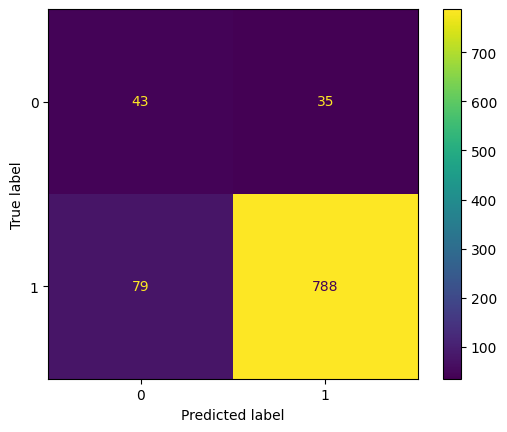

In [92]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dtc.classes_)
cm_display.plot()
plt.show()

In [111]:
import os
print(os.getcwd())

C:\Users\user


In [112]:
## saving scaler model

with open('C:\\Users\\user\\OneDrive\\ML_Projects\\Sentiment_Analysis\\models\\amazon_alexa_model_dtc.pkl', 'wb') as file:
    pickle.dump(scaler, file)